# Import libraries and load packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# Scrape needed data

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL of the website
url = "https://www.acb.com/resultados-clasificacion/ver/temporada_id/2023/competicion_id/1/jornada_numero/17"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table with class 'clasificacion'
table = soup.find("table", class_="clasificacion")

# empty lists to store data
positions = []
teams = []
games = []
wins = []
loses = []
points_for = []
points_against = []
points_dif = []

# Loop through table rows skipping the header row (first row)
for row in table.find_all("tr")[1:]:
    # Extract data from each row
    cells = row.find_all("td")
    position = cells[0].text.strip()
    team = cells[2].text.strip()
    game = cells[3].text.strip()
    win = cells[4].text.strip()
    lose = cells[5].text.strip()
    pf = cells[7].text.strip()
    pa = cells[8].text.strip()
    dif = cells[9].text.strip()
    
    # Append data to lists
    positions.append(position)
    teams.append(team)
    games.append(game)
    wins.append(win)
    loses.append(lose)
    points_for.append(pf)
    points_against.append(pa)
    points_dif.append(dif)

# Create a DataFrame
data = {
    'Position': positions,
    'Team': teams,
    'Games': games,
    'Wins': wins,
    'Loses': loses,
    'Points_For': points_for,
    'Points_Against': points_against,
    'Points_Difference': points_dif
}

LigaEndesa = pd.DataFrame(data)

# Print the DataFrame
LigaEndesa

,Position,Team,Games,Wins,Loses,Points_For,Points_Against,Points_Difference
0,1,RMBReal MadridReal Madrid,17,16,1,1.557,1.317,240
1,2,UNIUnicajaUnicaja,17,14,3,1.498,1.302,196
2,3,BARBarçaBarça,17,11,6,1.458,1.363,95
3,4,DGCDreamland Gran CanariaDreamland Gran Canaria,17,11,6,1.425,1.396,29
4,5,UCMUCAM MurciaUCAM Murcia,17,10,7,1.414,1.371,43
5,6,VBCValencia BasketValencia Basket,17,10,7,1.367,1.339,28
6,7,LNTLenovo TenerifeLenovo Tenerife,17,9,8,1.403,1.371,32
7,8,BAXBAXI ManresaBAXI Manresa,17,9,8,1.427,1.432,-5
8,9,BKNBaskoniaBaskonia,17,9,8,1.441,1.459,-18
9,10,CAZCasademont ZaragozaCasademont Zaragoza,17,8,9,1.391,1.391,0


In [3]:
# rename Team names
LigaEndesa['Team'] = LigaEndesa['Team'].replace({'RMBReal MadridReal Madrid': 'Real Madrid', 'UNIUnicajaUnicaja': 'Unicaja', 'BARBarçaBarça':'FC Barcelona','DGCDreamland Gran CanariaDreamland Gran Canaria':'Gran Canaria','UCMUCAM MurciaUCAM Murcia':'UCAM Murcia','VBCValencia BasketValencia Basket':'Valencia Basket',
                                                 'LNTLenovo TenerifeLenovo Tenerife':'Lenovo Tenerife','BAXBAXI ManresaBAXI Manresa':'BAXI Manresa','BKNBaskoniaBaskonia':'Baskonia','CAZCasademont ZaragozaCasademont Zaragoza':'Casademont Zaragoza',
                                                 'JOVJoventut BadalonaJoventut Badalona': 'Joventut Badalona', 'SBBSurne Bilbao BasketSurne Bilbao Basket':'Surne Bilbao Basket','GIRBàsquet GironaBàsquet Girona':'Bàsquet Girona','MBAMoraBanc AndorraMoraBanc Andorra':'MoraBanc Andorra','MOBMonbus ObradoiroMonbus Obradoiro':'Monbus Obradoiro','COVCoviran GranadaCoviran Granada':'Coviran Granada',
                                                 'BRERío BreogánRío Breogán':'Río Breogán', 'ZPAZunder PalenciaZunder Palencia':'Zunder Palencia'})
LigaEndesa


,Position,Team,Games,Wins,Loses,Points_For,Points_Against,Points_Difference
0,1,Real Madrid,17,16,1,1.557,1.317,240
1,2,Unicaja,17,14,3,1.498,1.302,196
2,3,FC Barcelona,17,11,6,1.458,1.363,95
3,4,Gran Canaria,17,11,6,1.425,1.396,29
4,5,UCAM Murcia,17,10,7,1.414,1.371,43
5,6,Valencia Basket,17,10,7,1.367,1.339,28
6,7,Lenovo Tenerife,17,9,8,1.403,1.371,32
7,8,BAXI Manresa,17,9,8,1.427,1.432,-5
8,9,Baskonia,17,9,8,1.441,1.459,-18
9,10,Casademont Zaragoza,17,8,9,1.391,1.391,0


In [4]:
# drop Position column
LigaEndesa = LigaEndesa.drop(['Position'], axis=1)

In [5]:
# correct data types
LigaEndesa['Games'] = pd.to_numeric(LigaEndesa['Games'], errors='coerce')
LigaEndesa['Wins'] = pd.to_numeric(LigaEndesa['Wins'], errors='coerce')
LigaEndesa['Loses'] = pd.to_numeric(LigaEndesa['Loses'], errors='coerce')
LigaEndesa['Points_For'] = pd.to_numeric(LigaEndesa['Points_For'], errors='coerce')
LigaEndesa['Points_Against'] = pd.to_numeric(LigaEndesa['Points_Against'], errors='coerce')
LigaEndesa['Points_Difference'] = pd.to_numeric(LigaEndesa['Points_Difference'], errors='coerce')


In [6]:
# ponts_for and ponts_against times thousand to change it from float to int64
LigaEndesa['Points_For'] = LigaEndesa['Points_For'] * 1000
LigaEndesa['Points_Against'] = LigaEndesa['Points_Against'] * 1000

# ponts_for and ponts_against to int64
LigaEndesa['Points_For'] = LigaEndesa['Points_For'].astype('int64')
LigaEndesa['Points_Against'] = LigaEndesa['Points_Against'].astype('int64')

In [7]:
# check df
LigaEndesa

,Team,Games,Wins,Loses,Points_For,Points_Against,Points_Difference
0,Real Madrid,17,16,1,1557,1317,240
1,Unicaja,17,14,3,1498,1302,196
2,FC Barcelona,17,11,6,1458,1363,95
3,Gran Canaria,17,11,6,1425,1396,29
4,UCAM Murcia,17,10,7,1414,1371,43
5,Valencia Basket,17,10,7,1367,1339,28
6,Lenovo Tenerife,17,9,8,1403,1371,32
7,BAXI Manresa,17,9,8,1427,1432,-5
8,Baskonia,17,9,8,1441,1459,-18
9,Casademont Zaragoza,17,8,9,1391,1391,0


In [8]:
# winning percentage and pythagorean expectation columns
LigaEndesa['wpc'] = LigaEndesa['Wins']/LigaEndesa['Games']
LigaEndesa['pyth'] = LigaEndesa['Points_For']**2/(LigaEndesa['Points_For']**2 + LigaEndesa['Points_Against']**2)
LigaEndesa

,Team,Games,Wins,Loses,Points_For,Points_Against,Points_Difference,wpc,pyth
0,Real Madrid,17,16,1,1557,1317,240,0.941176,0.582929
1,Unicaja,17,14,3,1498,1302,196,0.823529,0.569659
2,FC Barcelona,17,11,6,1458,1363,95,0.647059,0.533638
3,Gran Canaria,17,11,6,1425,1396,29,0.647059,0.510279
4,UCAM Murcia,17,10,7,1414,1371,43,0.588235,0.515436
5,Valencia Basket,17,10,7,1367,1339,28,0.588235,0.510346
6,Lenovo Tenerife,17,9,8,1403,1371,32,0.529412,0.511534
7,BAXI Manresa,17,9,8,1427,1432,-5,0.529412,0.498251
8,Baskonia,17,9,8,1441,1459,-18,0.529412,0.493793
9,Casademont Zaragoza,17,8,9,1391,1391,0,0.470588,0.500000


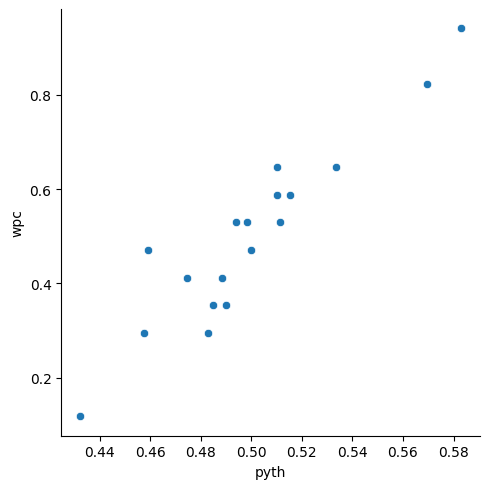

In [9]:
# plot wpc vs pyth 
sns.relplot(x="pyth", y="wpc", data = LigaEndesa)

In [10]:
# linear model wpc vs pyth 
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=LigaEndesa).fit()
pyth_lm.summary()

c:\analyst\environment310\lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     109.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.44e-08
Time:                        20:35:47   Log-Likelihood:                 22.867
No. Observations:                  18   AIC:                            -41.73
Df Residuals:                      16   BIC:                            -39.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9896      0.238     -8.347      0.000      -2.495      -1.484
pyth           4.9818      0.476     10.472      0.000       3.973       5.990
==============================================================================
Omnibus:                        2.708   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.110
Skew:                           0.550   Prob(JB):                        0.574
Kurtosis:                       3.518   Cond. No.                         35.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS Regression Results Analysis

The regression output reveals important insights into the relationship between win percentage (wpc) and the Pythagorean Expectation (pyth) in Basketball.

## Coefficients Interpretation:

- The coefficient (coef) for the Pythagorean Expectation is 4.9818. This suggests that for every one-unit increase in the Pythagorean Expectation, the win percentage increases by approximately 4.982.

## Statistical Significance:

- The high F-statistic (109.7) coupled with the very low p-value (1.44e-08) indicates that the model as a whole is highly significant. This implies that the Pythagorean Expectation is a significant predictor of win percentage in Basketball.

## Explained Variance:

- The R-squared value (0.873) suggests that approximately 87.3% of the variation in win percentage can be accounted for by the variation in the Pythagorean Expectation. This indicates a strong explanatory power of the Pythagorean Expectation in predicting win percentage.

## Adjusted R-squared:

- The Adjusted R-squared value (0.865) takes into account the number of predictors in the model. It indicates that after adjusting for the number of predictors, approximately 86.5% of the variance in win percentage can be explained by the Pythagorean Expectation.

In conclusion, the OLS regression results provide compelling evidence that the Pythagorean Expectation is a significant predictor of win percentage in Basketball. The model demonstrates strong statistical significance, suggesting that teams' success in basketball can be reliably predicted using the Pythagorean Expectation.


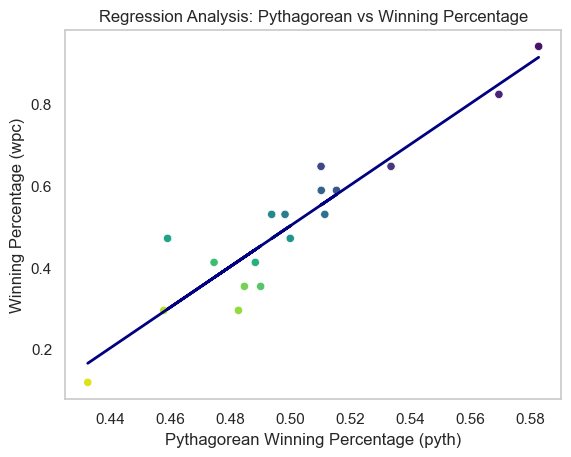

In [11]:
# plot wpc vs pyth with regression line

# Assuming pyth_lm is your OLS regression model and MLB18 is your DataFrame containing the data
sns.set(style="whitegrid")

# Plotting the data points without legend
sns.scatterplot(x="pyth", y="wpc", data=LigaEndesa, hue='Team', palette='viridis', legend=False)

# Plotting the regression line
plt.plot(LigaEndesa['pyth'], pyth_lm.predict(LigaEndesa['pyth']), color='navy', linewidth=2)
plt.grid(False)  # Remove gridlines

plt.xlabel('Pythagorean Winning Percentage (pyth)')
plt.ylabel('Winning Percentage (wpc)')
plt.title('Regression Analysis: Pythagorean vs Winning Percentage')

plt.show()

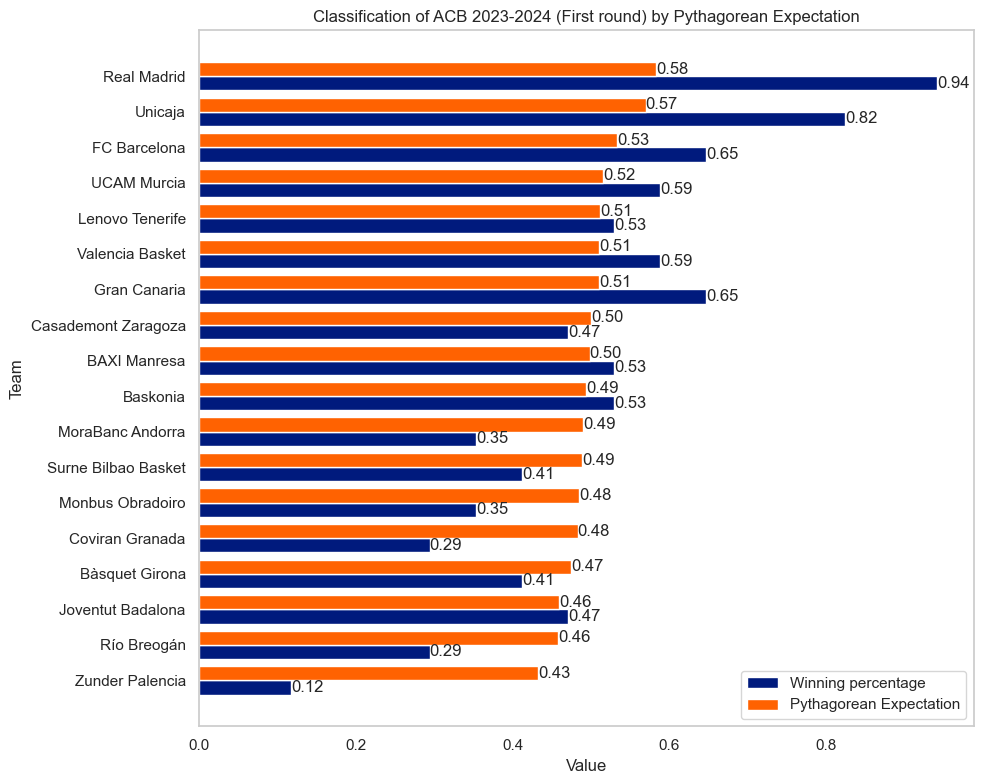

In [16]:
# plot classification by pyth 
# Sort by pyth
ACBFirstRound = LigaEndesa.sort_values(by='pyth', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
bar_height = 0.40
index = range(len(ACBFirstRound))

plt.xlabel('Value')
plt.ylabel('Team')
plt.title('Classification of ACB 2023-2024 (First round) by Pythagorean Expectation')

# Annotate bars with values
bars1 = plt.barh(index, ACBFirstRound['wpc'], bar_height, label='Winning percentage', color='#001A7D')
bars2 = plt.barh([i + bar_height for i in index], ACBFirstRound['pyth'], bar_height, label='Pythagorean Expectation', color='#FF6201')

for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left')

plt.yticks([i + bar_height / 2 for i in index], ACBFirstRound['Team'])
plt.legend()

plt.grid(False) 

plt.tight_layout()
plt.show()

Do we mean that Real Madrid C.F. and Unicaja Baloncesto have won more than they should have? Or Bàsquet Club Andorra S.A. less than they should have? According to these numbers, yes, but therein lies the magic of sports, and factors as arbitrary as player motivation come into play, along with the pressure each fan puts on their team, and, why not say it, luck!
